In [2]:
%matplotlib widget
# other options for matplotlib are: `widget`, `ipympl`, `notebook`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

from sklearn import linear_model

In [3]:
column_names = ['atom', 'x', 'y', 'z']
df = pd.read_csv('./reference_files/sI_Reference.xyz',
                 sep='\s+',
                 names=column_names,
                 skiprows=2)
# the `sep='\s+` is necessary because I want to use whitespace
# as the separator and not just `sep=" "`

In [4]:
df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
...,...,...,...,...
133,H,7.697636,3.195408,5.240990
134,H,5.549800,8.346895,6.032925
135,H,4.332364,8.834591,6.789010
136,H,7.979980,7.547020,6.010308


In [5]:
oxygen_df = df.iloc[:46, ]

oxygen_df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
5,O,0.000000,9.709172,10.608054
6,O,6.015000,3.006056,0.000000
7,O,6.015000,9.023943,0.000000
8,O,6.015000,1.421946,2.320827
9,O,6.015000,10.608054,2.320827


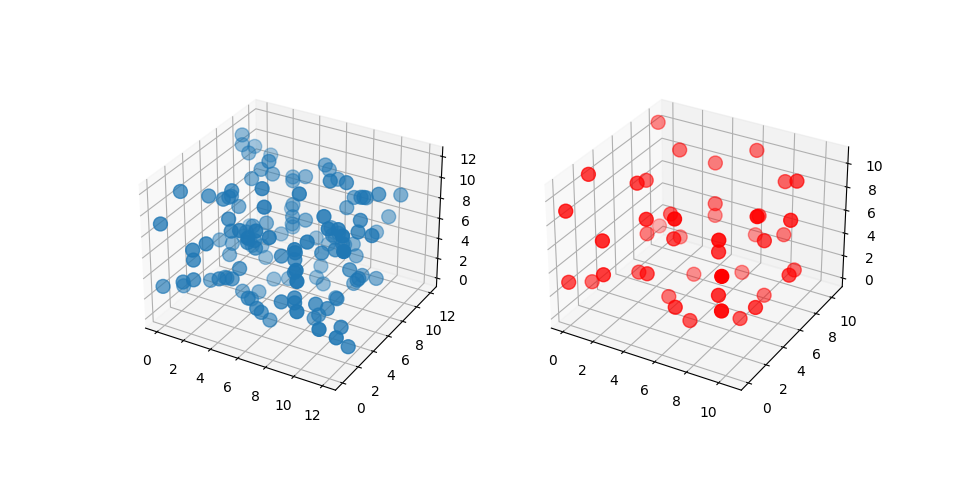

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plot all molecules
ax.scatter(df['x'], df['y'], df['z'],
           marker='o',
           s=100)
ax = fig.add_subplot(1, 2, 2, projection='3d')

# Plot oxgygens only 
ax.scatter(oxygen_df['x'], oxygen_df['y'], oxygen_df['z'],
            marker='o',
            s=100, 
            c='r')
plt.show()

In [10]:
X_cols = ['x', 'y']
y_col = ['z']

X_train = np.array(oxygen_df[X_cols])
y_train = np.array(oxygen_df[y_col])


In [47]:
ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(), residual_threshold=0.01)

ransac.fit(X_train, y_train)

C1 = ransac.estimator_.coef_[0][0]
C2 = ransac.estimator_.coef_[0][1]
D = ransac.estimator_.intercept_[0]

print("C1 = " + str(C1) + "\n" +
       "C2 = " + str(C2) + "\n" +
         "d = " + str(D))

C1 = -1.0150804462807266
C2 = 3.715093361069064e-17
d = 12.120708971983891


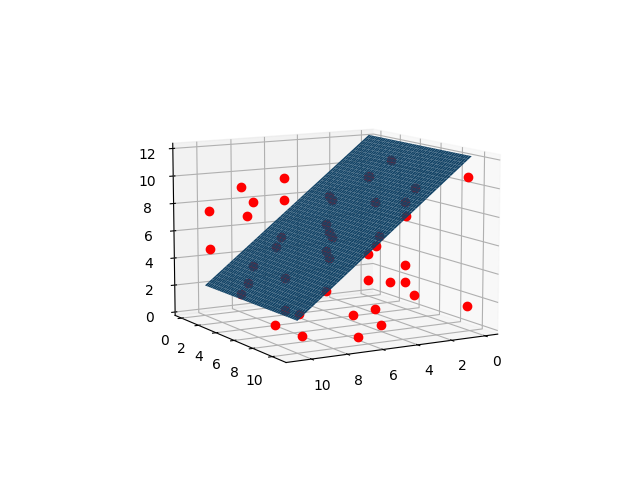

In [48]:
# the plane equation
z = lambda x,y: C1*x + C2*y + D

tmp = np.linspace(0,10,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train[:,0], X_train[:,1], y_train[:, 0], 'or')
ax.plot_surface(x, y, z(x,y))
ax.view_init(10, 60)
plt.show()